# Milestone 1

## Import

In [1]:
import autoreload
autoreload
import altair as alt
import vega_datasets as vg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

%matplotlib inline
%reload_ext autoreload
%autoreload 2


# Some code to stype plots

import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from scripts import project_functions

# EDA

## 1. Before Data Cleaning

### 1.1. Read-in raw dataset

In [2]:
data = pd.read_csv('../../data/raw/data.csv')
data.info()

# data_w_genres = pd.read_csv('../../data/processed/data_Shaohua/data_w_genres.csv')
# data_by_artist = pd.read_csv('../../data/processed/data_Shaohua/data_by_artist.csv')
# data_by_genres = pd.read_csv('../../data/processed/data_Shaohua/data_by_genres.csv')
# data_by_year = pd.read_csv('../../data/processed/data_Shaohua/data_by_year.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

### 1.2. Show the data

In [3]:
data.head()
# data_w_genres.head()
# data_by_artist.head()
# data_by_genres.head()
# data_by_year.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


### 1.3.Statistics

In [4]:
# Dimension
print(' ')
print('1. The dimension is: ')
print(data.shape)
print(' ')
print('-------')
print(' ')

# Statistics
print('2. The statistic info: ')
data.describe()

 
1. The dimension is: 
(174389, 19)
 
-------
 
2. The statistic info: 


,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


### 1.4. Report for data

In [5]:
from pandas_profiling import ProfileReport
# prof = ProfileReport(data)
# prof.to_file(output_file='report_for_original_data.html')

### 1.5. Sorting

In [6]:
# By Popularity (descending)
project_functions.sort_descending('popularity', data)

# By Valence (descending)
#project_functions.sort_descending('valence', data)

# By Loudness (descending)
#project_functions.sort_descending('loudness', data)

# By Liveness (descending)
#project_functions.sort_descending('liveness', data)

# By Key (ascending)
#project_functions.sort_ascending('key', data)

# By Energy (ascending)
#project_functions.sort_descending('energy', data)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
20062,0.721,['Olivia Rodrigo'],0.585,242014,0.436,1,7lPN2DXiMsVn7XUKtOW1CS,0.000013,10,0.1050,-8.761,1,drivers license,100,2021-01-08,0.0601,143.874,0.132,2021
19862,0.221,"['24kGoldn', 'iann dior']",0.700,140526,0.722,1,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,-3.558,0,Mood (feat. iann dior),96,2020-07-24,0.0369,90.989,0.756,2020
19866,0.468,['Ariana Grande'],0.737,172325,0.802,1,35mvY5S1H3J2QZyna3TFe0,0.000000,0,0.0931,-4.771,1,positions,96,2020-10-30,0.0878,144.015,0.682,2020
19886,0.401,"['Bad Bunny', 'Jhay Cortez']",0.731,205090,0.573,1,47EiUVwUp4C9fGccaPuUCS,0.000052,4,0.1130,-10.059,0,DÁKITI,95,2020-10-30,0.0544,109.928,0.145,2020
19976,0.212,['KAROL G'],0.863,178947,0.666,1,7vrJn5hDSXRmdXoR30KgF1,0.000493,1,0.1030,-4.158,0,BICHOTA,95,2020-10-23,0.1520,163.908,0.838,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63064,0.982,['Tarun Banerjee'],0.530,199227,0.204,0,0UJPWXDSQDfIBtEpZYWlK4,0.004510,11,0.1430,-15.468,0,Phul Nebe Go,0,1952-12-01,0.1080,79.712,0.320,1952
63063,0.994,['Georges Derveaux'],0.209,162623,0.245,0,0UEEHpJgY8di7fbAn7Z8lr,0.916000,2,0.1280,-15.440,1,Habanera,0,1952-01-01,0.0415,139.475,0.148,1952
63062,0.154,['Эрнест Хемингуэй'],0.800,95700,0.328,1,0Tyr2WpQlXyPq9VI4Ir7Fw,0.000000,6,0.2670,-17.704,1,Часть 44.3 - Старик и море,0,1952,0.9250,42.490,0.344,1952
63061,0.958,"['Hector Berlioz', 'Concertgebouworkest', 'Edu...",0.276,370787,0.172,0,0TqGhvkmiAiYg7YZ3CH6mj,0.633000,9,0.0651,-16.904,1,"Symphonie fantastique, Op. 14, H 48: 2. Un bal...",0,1952-01-01,0.0441,89.437,0.164,1952


### 1.6. Frequency Table

In [7]:
# How many songs each artists upload to spotify
data['artists'].value_counts()

['Tadeusz Dolega Mostowicz']               1281
['Эрнест Хемингуэй']                       1175
['Эрих Мария Ремарк']                      1062
['Francisco Canaro']                        951
['Ignacio Corsini']                         624
                                           ... 
['Esthie']                                    1
['Sudha Karmase']                             1
['Albertina Walker', 'James Cleveland']       1
['Axis Dezer']                                1
['Life Without Buildings']                    1
Name: artists, Length: 36195, dtype: int64

### 1.7. Plotting (Commented. Warning: huge dataset, long compiling time)

In [8]:
# To enable plotting, the following needs to be executed
alt.data_transformers.disable_max_rows()

# 1. The Relationship between loudness and popularity
#project_functions.scatter_chart('loudness','popularity', data)
# 2. The number of songs published per year
#project_functions.bar_chart('year','count()', data)

DataTransformerRegistry.enable('default')

Outcome If Run

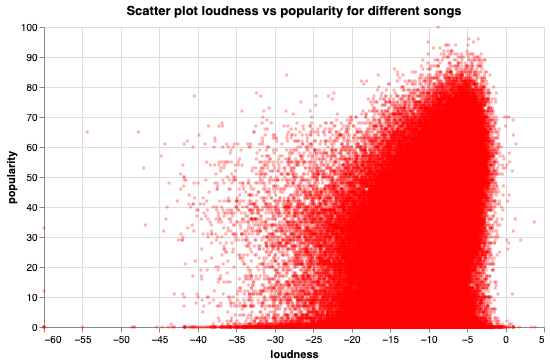

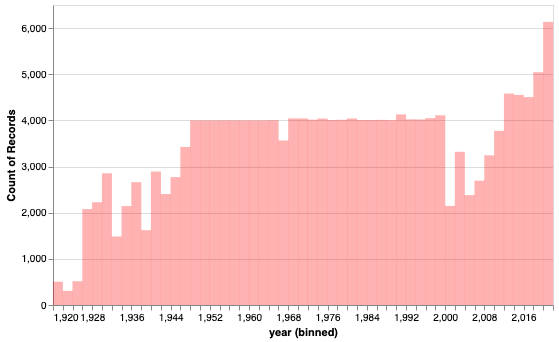

## 2. Cleaned Data

### 2.1. Load and Process Data

In [9]:
import pandas as pd
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from scripts import project_functions
new_data = project_functions.load_and_process('../../data/raw/data.csv')
new_data.to_csv('../../data/processed/data_processed.csv')
new_data


,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
0,0.9910,['Mamie Smith'],0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,0.0936,149.976,0.634,1920
20300,0.4960,"['ST', '98', '1920Johnny', 'Barracuda', 'Nikla...",0.712,230348,0.402,1,0.000002,0,0.0796,-9.326,0,Magaluf,0,0.1610,142.003,0.438,1920
20299,0.9960,['Francisco Canaro'],0.607,178947,0.352,0,0.955000,1,0.1580,-14.153,0,Príncipe - Remasterizado,0,0.0520,122.839,0.570,1920
20298,0.9950,['Bonheur Alice'],0.230,188893,0.130,0,0.000002,0,0.3740,-22.512,0,Ah Tais Toi Tu M'affoles,0,0.0617,78.779,0.277,1920
20297,0.2800,"['ST', '1920Johnny', '98', 'Barracuda', 'Brbk'...",0.843,295915,0.481,1,0.000000,6,0.1100,-8.444,0,Bébé,0,0.2610,100.011,0.410,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126778,0.0280,['BeatStrumentalz'],0.597,176520,0.540,0,0.005180,10,0.0678,-5.786,1,LOVE SONG,0,0.0254,119.171,0.328,2021
126777,0.1580,"['Galantis', 'JVKE']",0.800,140012,0.660,0,0.020000,0,0.1400,-4.903,1,Dandelion,74,0.1580,117.923,0.634,2021
126776,0.0898,['Vyacheslav Sketch'],0.820,378038,0.813,0,0.863000,7,0.5530,-7.622,1,The End,0,0.1490,119.995,0.683,2021
126790,0.0175,['TON Jayy'],0.818,160402,0.359,1,0.000000,0,0.0903,-16.376,1,Me N Gang,0,0.7960,144.057,0.128,2021


### 2.2. Shape of DataFrame

In [10]:
# Get the count of columns
count_of_columns = len(new_data.columns)
print("The number of columns after data processing is:", count_of_columns)

# Get the number of rows and columns
print("The number of rows and columns after data processing is:", new_data.shape)

The number of columns after data processing is: 17
The number of rows and columns after data processing is: (174389, 17)


### 2.3. Set the Seaborn figure theme and text size

In [11]:
sns.set_theme(style='darkgrid', font_scale=1.3)

### 2.4. Describe the dataset

The Spotify dataset has been obtained from Kaggle, a data science community where public datasets are available for use. It is courtesy of Yamac Eren Ay, a Data Scientist from Berlin and a passionate music listener. This dataset has been created to serve the scientific exploration of the evolution of musical tastes.

It contains data on audio features of more than 175,000 songs released between 1921 and 2021 collected using the Spotify Web API. The noteworthy features include acousticness, danceability, energy, popularity, tempo, and speechiness. In addition, songs are categorized by key, artists, release date, and name. The ‘id’ field uniquely identifies the observations.

The dataset contains *5* files. ‘data.csv’ is the main file, and the other ones were created using data from this file. While the **numerical** values - acousticness, danceability, energy, valence, instrumentalness, speechiness, tempo, loudness, duration_ms, liveness, and popularity – were obtained by calculating the mean of the values obtained from the API, **categorical** features such as ‘key’ and ‘mode’ were obtained by calculating the mode of the values. Moreover, ‘popularity’ is based on US data, not worldwide data, and this could potentially limit the scope of the analysis.

### 2.5. Numerical and Categorical Data

In [12]:
# Static for numerical data
new_data.describe(include=np.number, 
             datetime_is_numeric=True).T

,count,mean,std,min,25%,50%,75%,max
acousticness,174389.0,0.499228,0.379936,0.0,0.0877,0.517000,0.8950,0.996
danceability,174389.0,0.536758,0.176025,0.0,0.4140,0.548000,0.6690,0.988
duration_ms,174389.0,232810.032026,148395.797680,4937.0,166133.0000,205787.000000,265720.0000,5338302.000
energy,174389.0,0.482721,0.272685,0.0,0.2490,0.465000,0.7110,1.000
explicit,174389.0,0.068135,0.251978,0.0,0.0000,0.000000,0.0000,1.000
instrumentalness,174389.0,0.197252,0.334574,0.0,0.0000,0.000524,0.2520,1.000
key,174389.0,5.205305,3.518292,0.0,2.0000,5.000000,8.0000,11.000
liveness,174389.0,0.211123,0.180493,0.0,0.0992,0.138000,0.2700,1.000
loudness,174389.0,-11.750865,5.691591,-60.0,-14.9080,-10.836000,-7.4990,3.855
mode,174389.0,0.702384,0.457211,0.0,0.0000,1.000000,1.0000,1.000


In [13]:
# Static for categorical data
new_data.describe(exclude=np.number, 
              datetime_is_numeric=True).T

,count,unique,top,freq
artists,174389,36195,['Tadeusz Dolega Mostowicz'],1281
name,174389,137013,White Christmas,103


### 2.6. Report for new_data

In [14]:
# prof = ProfileReport(new_data)
# prof.to_file(output_file='report_for_new_data.html')

### 2.8. Research questions

1. RQ1: Within the artists that posted the top 5 most popular songs, who has the most number of song releases?
2. RQ2: What are top 5 artists in terms of the count of song releases?
3. RQ3: What are the trends and interrelationships of major and minor keys

### 2.9. Data Analysis and Visualizations (10 marks)

#### 2.9.1. Counts of top 5 releases by artists

Index(['Francisco Canaro', 'Tadeusz Dolega Mostowicz', 'Эрнест Хемингуэй',
       'Эрих Мария Ремарк', 'Frédéric Chopin'],
      dtype='object')


<AxesSubplot:xlabel='count', ylabel='artists'>

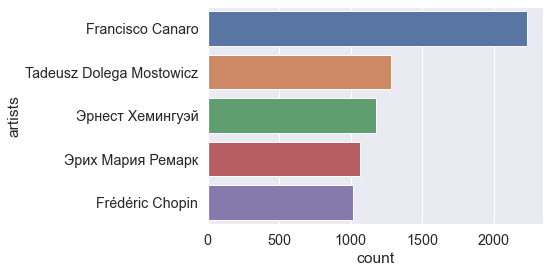

In [15]:
split_artists_data = project_functions.convert_and_explode('artists', new_data)
split_artists_data

print(split_artists_data['artists'].value_counts().iloc[:5].index)

sns.countplot(y='artists', 
              data=split_artists_data, 
              #hue='popularity', 
              order = split_artists_data['artists'].value_counts().iloc[:5].index)

#### 2.9.2. Plot the Release Counts Over Time by Mode (Major and Minor)

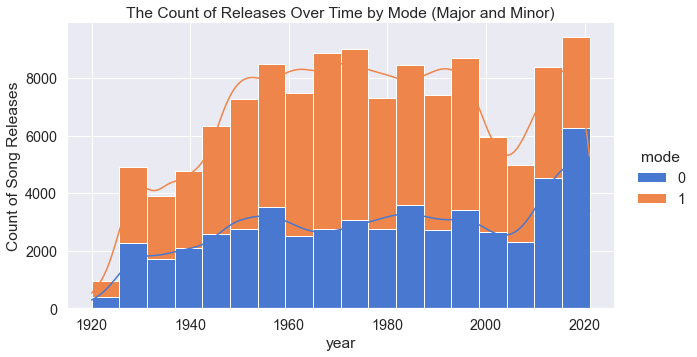

In [16]:
sns.displot(data=new_data, 
            x = 'year', 
            hue='mode', 
            palette='muted', 
            #multiple="stack", 
            kde=True, 
            aspect=1.8, 
            alpha=1,
            bins=18).set(
    ylabel='Count of Song Releases', 
    title='The Count of Releases Over Time by Mode (Major and Minor)')

#### 2.9.3. Plot the Release Counts by Keys with Modes

[Text(0.5, 0, 'Count of Song Releases'),
 Text(0.5, 1.0, 'The Count of Releases by Key with Mode (Major and Minor)')]

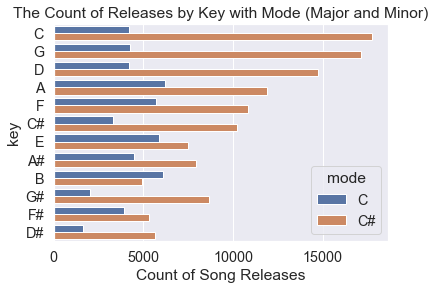

In [17]:
key_data = new_data.replace({0:'C', 1:'C#', 2:'D', 3: 'D#', 4:'E', 5:'F', 6:'F#', 7:'G', 8:'G#', 9:'A', 10:'A#', 11:'B'})
sns.countplot(y='key', 
              data=key_data, 
              hue='mode', 
              order = key_data['key'].
              value_counts().
              index).set(
    xlabel='Count of Song Releases', 
    title='The Count of Releases by Key with Mode (Major and Minor)')

#### 2.9.4. Songs with 100 Popularity

In [18]:
new_data[new_data['popularity'] == 100]

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
20062,0.721,[Olivia Rodrigo],0.585,242014,0.436,1,0.000013,10,0.105,-8.761,1,drivers license,100,0.0601,143.874,0.132,2021


#### 2.9.5. Counts of Releases of 5 Artists That Own the Top 5 Popular Songs

In [19]:
# Split the songs with multiple artists to each artist having the song#

import ast
#new_data
split_artists_data = project_functions.convert_and_explode('artists', new_data)
split_artists_data



,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
0,0.9910,Mamie Smith,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,0.0936,149.976,0.634,1920
20300,0.4960,ST,0.712,230348,0.402,1,0.000002,0,0.0796,-9.326,0,Magaluf,0,0.1610,142.003,0.438,1920
20300,0.4960,98,0.712,230348,0.402,1,0.000002,0,0.0796,-9.326,0,Magaluf,0,0.1610,142.003,0.438,1920
20300,0.4960,1920Johnny,0.712,230348,0.402,1,0.000002,0,0.0796,-9.326,0,Magaluf,0,0.1610,142.003,0.438,1920
20300,0.4960,Barracuda,0.712,230348,0.402,1,0.000002,0,0.0796,-9.326,0,Magaluf,0,0.1610,142.003,0.438,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126777,0.1580,Galantis,0.800,140012,0.660,0,0.020000,0,0.1400,-4.903,1,Dandelion,74,0.1580,117.923,0.634,2021
126777,0.1580,JVKE,0.800,140012,0.660,0,0.020000,0,0.1400,-4.903,1,Dandelion,74,0.1580,117.923,0.634,2021
126776,0.0898,Vyacheslav Sketch,0.820,378038,0.813,0,0.863000,7,0.5530,-7.622,1,The End,0,0.1490,119.995,0.683,2021
126790,0.0175,TON Jayy,0.818,160402,0.359,1,0.000000,0,0.0903,-16.376,1,Me N Gang,0,0.7960,144.057,0.128,2021


[Text(0.5, 1.0, 'Counts of Releases of 5 Artists That Own the Top 5 Popular Songs')]

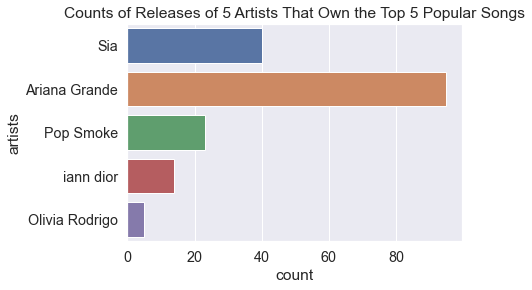

In [20]:
# Start visualizing
top_5_popular = project_functions.sort_descending('popularity', 
                                                  split_artists_data).iloc[split_artists_data['popularity'].
                                                                 value_counts().
                                                                 iloc[:5].
                                                                 index]
top_5_popular['artists']

split_artists_data[split_artists_data['artists'].isin(top_5_popular['artists'])]

sns.countplot(y='artists', 
              data=split_artists_data[split_artists_data['artists'].isin(top_5_popular['artists'])], 
              #hue='popularity', 
             ).set(title='Counts of Releases of 5 Artists That Own the Top 5 Popular Songs')


#### 2.9.6. Correlation Between All Pairs of Variables

[Text(0.5, 1.0, 'The Correlation Between All Variables')]

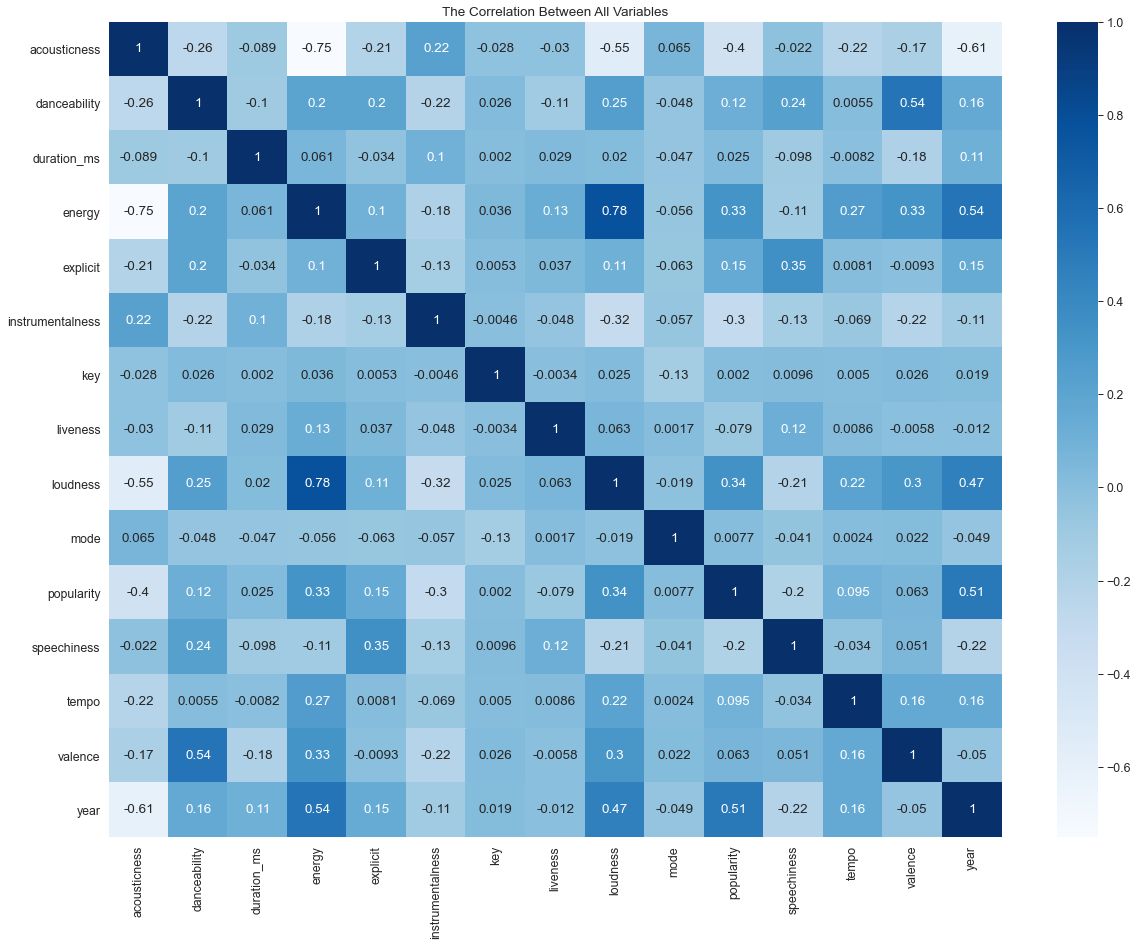

In [21]:
plt.figure(figsize=(20, 15))
sns.set_context('paper', font_scale=1.4)
new_data_mx = new_data.corr()

# new_data_mx

# Create the heatmap, add annotations and a color map
sns.heatmap(new_data_mx, 
            annot=True, 
            cmap='Blues').set(
    title='The Correlation Between All Variables')

### B8. Summary and Conclusions

- **Research Question 1:** Within the artists that posted the top 5 most popular songs, who has the most number of song releases? 

    - Summary of findings: accoring to the plot from 2.9.5., the artists that posted the top 5 most popular songs are Sia, Ariana Grande, Pop Smoke, iann dior, and Olivia Rodrigo. Among them, Ariana Grande has released much more songs than any of the other artists.
    - Insight: Ariana Grande is very popular recently and I guess that is why this phenomenon happens.
    - Conclusions: Within the artists that posted the top 5 most popular songs, Ariana Grande has the most number of song releases.
    

- **Research Question 2:** What are top 5 artists in terms of the count of song releases?
    - Summary of findings: according to the plot from 2.9.1., the qualified artists are Francisco Canaro, Tadeusz Dolega Mostowicz, Эрнест Хемингуэй,Эрих Мария Ремарк, and Frédéric Chopin.
    - Insight: to be subjective, I have heard the names of most of them, and Frédéric Chopin is one of my favorite artists.
    - Conclusions: the top 5 artists in terms of the count of song releases are Francisco Canaro, Tadeusz Dolega Mostowicz, Эрнест Хемингуэй,Эрих Мария Ремарк, and Frédéric Chopin.
    
- **Research Question 3:** What are the trends and interrelationships of major and minor mode
    - Summary of findings: according to the plot from 2.9.2, both the amount of releases of major keys and that of minor keys are gradually increasing. Moreover, in each decade, the total release of the major key is much greater than that of the minor key. According to the plot from 2.9.3, all the keys except B have more major mode released than minor mode.
    - Insight: in my opinion, since major keys promote positive emotions and are widely accepted, more release is reasonable.
    - Conclusions: 
        1. Both the amount of releases of major keys and that of minor keys are gradually increasing 
        2. The total release of the major key is much greater than that of the minor key.
        3. Most keys have more major mode released than minor mode released
    
    